In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb  6 10:10:48 2017

@author: lhuan
"""

%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import *
import statsmodels.formula.api as sm
import matplotlib
matplotlib.style.use('ggplot')

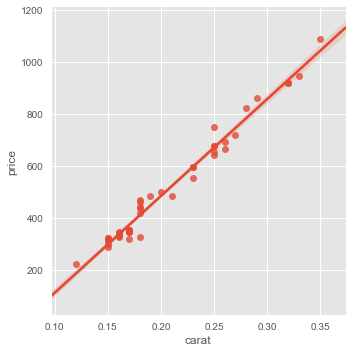

In [5]:
# build simple linear regression with only one variable: carat
# load csv input file
diamond2 = pd.DataFrame.from_csv('diamond2.csv', header=0, sep=',', index_col=0, parse_dates=True, 
                                encoding=None, tupleize_cols=False, infer_datetime_format=False)
diamond2['carat']=list(diamond2.index)
# scatter plot
sns.lmplot(x='carat',y='price',data=diamond2,fit_reg=True) 

In [6]:
# fit a basic linear regression model 
result = sm.ols(formula="price ~ carat", data=diamond2).fit()
print(result.params)
print(result.summary())

Intercept    -259.625907
carat        3721.024852
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 21 Feb 2017   Prob (F-statistic):           6.75e-40
Time:                        21:53:10   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------

In [7]:
# get a more interpretable intercept.
# the intercept $500.1 is the expected price for the average sized diamond of the data (0.2041 carats)
result2 = sm.ols(formula="price ~ I(carat-np.mean(carat))", data=diamond2).fit()
print(result2.params)
print(result2.summary())

Intercept                     500.083333
I(carat - np.mean(carat))    3721.024852
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 21 Feb 2017   Prob (F-statistic):           6.75e-40
Time:                        22:14:17   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------

In [8]:
# Change scale from 1 carat to 0.1 carat. When diamond increases by 0.1 carat, 
# its predicted price is increased by $372.1
result3 = sm.ols(formula="price ~ I(carat*10)", data=diamond2).fit()
print(result3.params)
print(result3.summary())

Intercept       -259.625907
I(carat * 10)    372.102485
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 21 Feb 2017   Prob (F-statistic):           6.75e-40
Time:                        22:14:27   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------

In [9]:
#In sample and  Out of sample prediction
x = diamond2['carat']
y = diamond2['price']
xnew = [0.36,0.38,0.40,0.42,0.44,0.50,0.54,0.58,0.62,0.66]
xnew = list(diamond2['carat'])+xnew
d = {'carat':xnew}
dfnew = DataFrame(data=d)
yprednew = result.predict(dfnew)

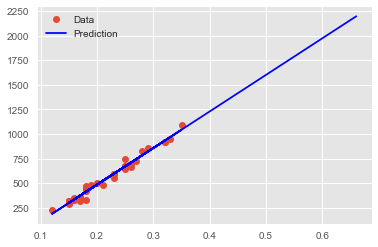

In [10]:
# plot observed values and predicted values
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label="Data")
ax.plot(xnew,yprednew, 'b-', label="Prediction")
ax.legend(loc="best");